In [1]:

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from anndata import AnnData
from scipy.stats import gaussian_kde
import scvelo as scv
import math
import scipy
from scipy import stats

from collections import defaultdict
import warnings
from scipy.stats import chisquare
warnings.filterwarnings('ignore')
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization
scv.settings.set_figure_params('scvelo')  # for beautified visualization

import diffxpy.api as de
import os
from scipy.sparse import csr_matrix

#adata = sc.read_h5ad("P94P1.h5ad")

In [5]:

import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_heatmap(df, dataset):
    # Generate the heatmap
    # Generate the clustermap
    sns.clustermap(
        df,
        cmap='coolwarm',
        figsize=(18, 6),
        #annot=True,
        cbar=True,
        dendrogram_ratio=(0.2, 0.2),  # Adjust the size ratio of dendrograms
        method='average',  # Clustering method
        metric='euclidean',  # Distance metric
    )
    
    # Customize the plot title
    plt.suptitle("Gene's Presence Probability by Morphological Region - " + dataset, y=1.02)
    
    # Show the plot
    plt.show()
    

In [6]:
degs_all_anterior = [
'AABR07000398.1',
'AABR07015346.1',
'AABR07017733.1',
'AABR07029732.1',
'AABR07034639.1',
'AABR07053166.1',
'AABR07066379.1',
'AABR07066700.1',
'AABR07072400.1',
'Abhd12',
'AC098622.1',
'AC108631.1',
'AC113910.1',
'AC121415.1',
'Acat1',
'Acat2',
'Acot1',
'Adcyap1r1',
'Add3',
'Adgrb2',
'Adora2a',
'Adrm1',
'Ajap1',
'Akap8l',
'Alg2',
'Amph',
'Ankrd63',
'Apmap',
'Apoe',
'Aqp4',
'Arhgdib',
'Arhgef2',
'Asic1',
'Asic4',
'Atcay',
'Atox1',
'Atp1a1',
'Atp1a3',
'Atp1b2',
'Atp2b2',
'Atp6v0a1',
'Atp6v1g2',
'Atp6v1h',
'B4galt6',
'B4gat1',
'Bcan',
'Bcas1',
'Bin1',
'Bmp4',
'Bola3',
'Bscl2',
'Bsg',
'C1qb',
'C1ql1',
'C1qtnf4',
'C2cd2l',
'Cacna2d2',
'Cacng4',
'Cadm4',
'Camk2b',
'Camk2n1',
'Camkv',
'Capns1',
'Cartpt',
'Ccdc9',
'Cck',
'Cd63',
'Cd9',
'Cdc42se2',
'Cdh13',
'Cdk17',
'Cdkl1',
'Celf2',
'Cend1',
'Cenpb',
'Chchd2.1',
'Chchd4',
'Chgb',
'Chpf',
'Ckmt1',
'Cldn11',
'Clec2l',
'Clptm1',
'Clu',
'Cmip',
'Cnp',
'Col9a3',
'Colec11',
'Commd6',
'Coprs',
'Coro7',
'Cox7a2l2',
'Cpne6',
'Crabp1',
'Crem',
'Crtac1',
'Crym',
'Csnk2b',
'Ctsa',
'Ctsb',
'Ctsd',
'Ctsf',
'Cttn',
'Cx3cl1',
'Cycs',
'Cyp46a1',
'Decr1',
'Dennd1a',
'Dgat2',
'Diras2',
'Dleu7',
'Dmrtb1',
'Dmtf1',
'Dmwd',
'Dnpep',
'Dok5',
'Dpysl2',
'Dynll1',
'Dzip3',
'Ebpl',
'Eepd1',
'Egr4',
'Elavl3',
'Elmod1',
'Eln',
'Emc10',
'Emid1',
'Eno1',
'Eno2',
'Enpp2',
'ENSRNOG00000002618',
'ENSRNOG00000003209',
'ENSRNOG00000005185',
'ENSRNOG00000029052',
'ENSRNOG00000029172',
'ENSRNOG00000029512',
'ENSRNOG00000032042',
'ENSRNOG00000033517',
'ENSRNOG00000037661',
'ENSRNOG00000048258',
'ENSRNOG00000051885',
'ENSRNOG00000056765',
'ENSRNOG00000059381',
'ENSRNOG00000062590',
'ENSRNOG00000062652',
'ENSRNOG00000063015',
'ENSRNOG00000063425',
'ENSRNOG00000063528',
'ENSRNOG00000064315',
'ENSRNOG00000065062',
'ENSRNOG00000065095',
'ENSRNOG00000066033',
'ENSRNOG00000066117',
'ENSRNOG00000066942',
'ENSRNOG00000067240',
'ENSRNOG00000067926',
'ENSRNOG00000068039',
'ENSRNOG00000068180',
'ENSRNOG00000068779',
'ENSRNOG00000069425',
'Erg28',
'Etv5',
'Fabp7',
'Fam110d',
'Fam71e2',
'Fbln2',
'Fbxo34',
'Fcrl2',
'Fermt2',
'Folr1',
'Foxo6',
'Fstl1',
'Fus',
'Fxyd7',
'Gaa',
'Gabbr1',
'Gabrd',
'Galnt16',
'Gamt',
'Gars',
'Gdpd5',
'Gfap',
'Ggcx',
'Gja1',
'Glul',
'Gmpr',
'Gnb1',
'Grik5',
'Grin1',
'Grina',
'Grn',
'Grp',
'H1f0',
'H1f2',
'H3f3a.1',
'Hap1',
'Hba-a2',
'Hbb-b1',
'Hist1h2bq',
'Hnrnpdl',
'Hopx',
'Hpca',
'Hpcal1',
'Hrh3',
'Hs6st1',
'Hspa8',
'Icam5',
'Id1',
'Id3',
'Idi1',
'Ier5',
'Ifi27',
'Iftap',
'Igf2',
'Igfbp2',
'Igfbp5',
'Igsf21',
'Ikzf4',
'Impdh1',
'Inf2',
'Insig1',
'Itih3',
'Itm2b',
'Itm2c',
'Itpka',
'Itpr1',
'Jun',
'Jund',
'Kcnip2',
'Kcnj4',
'Kdm2b',
'Klf5',
'Klhl7',
'Kxd1',
'Lamp1',
'Lamp5',
'Large1',
'Lgmn',
'Lhx2',
'Lix1l',
'Lmtk2',
'Lpin3',
'Lpl',
'Lrfn3',
'Lrfn4',
'Lrrn2',
'Lsm12',
'Lsm14b',
'Lss',
'Mag',
'Map1s',
'Map6',
'Matk',
'Matn4',
'Mbp',
'Mccc2',
'Mdk',
'Med29',
'Mfrp',
'Mfsd10',
'Mlc1',
'Mmd2',
'Mpeg1',
'Mpv17l2',
'Mpzl1',
'Mrps18c',
'Msmo1',
'Mt2A',
'Mt-atp6',
'Mt-co1',
'Mt-cyb',
'Mt-nd3',
'Mt-nd4',
'Mvd',
'Myo5b',
'Nalcn',
'Nap1l5',
'Nceh1',
'Ncl',
'Ncln',
'Ncor2',
'Ndrg3',
'Ndufab1',
'Ndufv1',
'Necap1',
'Nectin1',
'Nefm',
'Nell1',
'Neurod6',
'Nfx1',
'Nfya',
'Niban3',
'Nit2',
'Npnt',
'Npy',
'Nr1d1',
'Nrp2',
'Nsf',
'Nt5dc2',
'Ntm',
'Nts',
'Ntsr2',
'Nup210',
'Nupr2',
'Nxph1',
'Ogdhl',
'Omg',
'Otub1',
'P4htm',
'Park7',
'Pcsk2',
'Pdgfra',
'Penk',
'Pgls',
'Phgdh',
'Phyhip',
'Pik3r2',
'Plbd2',
'Pld3',
'Plk2',
'Plp1',
'Plpp3',
'Polr2f',
'Polr2k',
'Polr3k',
'Pop5',
'Porcn',
'Ppp1r14b',
'Ppp1r17',
'Ppp1r1b',
'Prdm8',
'Prkcsh',
'Prpf19',
'Prrt1',
'Psap',
'Ptgds',
'Ptk2b',
'Ptprn',
'Ptprn2',
'Purb',
'Pxdn',
'Rab3b',
'Ramp3',
'Rap1gds1',
'Rasd2',
'Rbbp6',
'Rcn1',
'Resp18',
'Rfng',
'RGD1359290',
'RGD1559896',
'RGD1564606',
'Rgma',
'Rgs9',
'Rnd2',
'Rnf10',
'Robo1',
'Rpl17',
'Rpl21.1',
'Rpl22l1',
'Rpl23',
'Rpl26',
'Rpl27',
'Rpl30',
'Rpl35',
'Rpl35al1',
'Rpl38.1',
'Rpl39.4',
'Rpl7a',
'Rprml',
'Rps11',
'Rps14',
'Rps16',
'Rps18',
'Rps18l1',
'Rps2',
'Rps23',
'Rps25',
'Rps27',
'Rps27l',
'Rps4x.1',
'Rsl24d1',
'Rsrp1',
'Rtn3',
'Sart1',
'Scarb1',
'Scg5',
'Scmh1',
'Scn1b',
'Sec23b',
'Sec61a2',
'Selenoh',
'Setd1b',
'Sh2b2',
'Shisa9',
'Sirpa',
'Sirt2',
'Slc16a1',
'Slc17a7',
'Slc1a3',
'Slc22a17',
'Slc24a3',
'Slc27a1',
'Slc27a2',
'Slc32a1',
'Slc3a2',
'Slc44a1',
'Slc45a1',
'Slc4a3',
'Slc6a17',
'Snca',
'Sncb',
'Snrpe',
'Snrpg.1',
'Sorcs2',
'Sort1',
'Sparcl1',
'Spns1',
'Spock3',
'Sppl2b',
'Sptbn4',
'Sqle',
'Srsf5',
'Stk25',
'Stum',
'Stx2',
'Sulf2',
'Syp',
'Tecr',
'Thy1',
'Timm8b',
'Tma7',
'Tmbim6',
'Tmem130',
'Tmem132a',
'Tmem178a',
'Tmem222',
'Tmem38a',
'Tmub2',
'Tnc',
'Tpt1',
'Trpm3',
'Tspan2',
'Tspan7',
'Ttr',
'Tuba4a',
'Tubb4a',
'Tubb4b',
'Txnip',
'Ube2ql1',
'Uqcrc1',
'Vcan',
'Vsnl1',
'Wdr47',
'Wdr6',
'Ybx1',
'Zdhhc14',
'Zdhhc18',
'Zeb2',
'Zmynd8',
]
degs_all_posterior = [
'AABR07000398.1',
'AABR07000398.1',
'AABR07007675.1',
'AABR07017733.1',
'AABR07029732.1',
'AABR07066379.1',
'AABR07066700.1',
'AC098622.1',
'AC113910.1',
'Acat2',
'Ache',
'Acly',
'Acot1',
'Acsl3',
'Adgrb2',
'Adra1b',
'Agt',
'Ajap1',
'Aldoc',
'Amd1',
'Aqp4',
'Arhgdib',
'Arl6',
'Asb2',
'Asic1',
'Astn1',
'Atp1a1',
'Atp2b1',
'Atp2b2',
'Atp5me',
'Atp5mk',
'Baiap2',
'Bbc3',
'Bcan',
'Bcas1',
'Bhlhe22',
'Bmp4',
'Bola2',
'Bscl2',
'C1ql1',
'Cacna2d3',
'Capns1',
'Caprin1',
'Cbln1',
'Ccdc90b',
'Ccp110',
'Cd9',
'Cdk2ap2',
'Celf3',
'Celf4',
'Cend1',
'Chchd2.1',
'Chga',
'Chgb',
'Chl1',
'Chrne',
'Cldn11',
'Clec2l',
'Clk1',
'Clptm1',
'Clu',
'Col11a2',
'Col6a1',
'Commd6',
'Comt',
'Cox7a2l2',
'Crabp1',
'Crip1',
'Crym',
'Csdc2',
'Cstb',
'Cxcl14',
'Cyb5a.1',
'Cyp51',
'Dcx',
'Dgkz',
'Diras2',
'Dleu7',
'Dmtf1',
'Dmwd',
'Dnm1',
'Dynlt1',
'Ebpl',
'Ecel1',
'Elavl4',
'Elob',
'Emid1',
'Eno2',
'ENSRNOG00000007682',
'ENSRNOG00000010149',
'ENSRNOG00000012929',
'ENSRNOG00000025463',
'ENSRNOG00000027694',
'ENSRNOG00000032042',
'ENSRNOG00000033517',
'ENSRNOG00000039350',
'ENSRNOG00000049908',
'ENSRNOG00000051885',
'ENSRNOG00000056765',
'ENSRNOG00000062590',
'ENSRNOG00000062930',
'ENSRNOG00000063425',
'ENSRNOG00000063528',
'ENSRNOG00000064545',
'ENSRNOG00000065062',
'ENSRNOG00000065095',
'ENSRNOG00000065867',
'ENSRNOG00000066117',
'ENSRNOG00000066942',
'ENSRNOG00000067240',
'ENSRNOG00000068039',
'ENSRNOG00000068254',
'ENSRNOG00000068779',
'ENSRNOG00000069492',
'ENSRNOG00000069961',
'ENSRNOG00000070574',
'Epn1',
'Erg28',
'Esyt2',
'Ewsr1',
'Fam102b',
'Fam110d',
'Fam111a',
'Fam71e2',
'Fau',
'Fcrl2',
'Fndc3a',
'Ftcd',
'Ftl1',
'Fus',
'Fxyd6',
'Gad1',
'Gak',
'Gapdh',
'Gatd3a',
'Gfap',
'Gja1',
'Gpr158',
'Gpr85',
'Grik5',
'Grin1',
'Gsn',
'Gucy1a1',
'H1f0',
'H3f3a.1',
'Hacd1',
'Hba-a2',
'Hdac11',
'Hes6',
'Hist1h2bq',
'Hnrnpdl',
'Hspa5',
'Hspa8',
'Id3',
'Id4',
'Idi1',
'Igfbp2',
'Ikzf4',
'Insig1',
'Itih3',
'Itm2a',
'Itpka',
'Jun',
'Jup',
'Kbtbd7',
'Kctd1',
'Kdm2b',
'Kiaa0408L',
'Kif3c',
'Kitlg',
'Klhdc3',
'Klhl7',
'Kpnb1',
'Ldhb',
'Lhx2',
'Lix1l',
'Lmo1',
'Lynx1',
'Mag',
'Map1a',
'Map2',
'Map6',
'Mat2a',
'Mbp',
'Med29',
'Meis2',
'Mettl6',
'Mex3b',
'Mfsd10',
'Mrpl43',
'Msmo1',
'Mt2A',
'Mt3',
'Mt-atp8',
'Mt-nd4l',
'Mtss1',
'Mvd',
'Mycn',
'Nat8',
'Ncln',
'Ndrg3',
'Ndufa10l1.1',
'Ndufa3',
'Ndufv3',
'Nefl',
'Nefm',
'Nell1',
'Neurod1',
'Neurod6',
'Nfya',
'Nit2',
'Nkain2',
'Npnt',
'Nrxn3',
'Nsf',
'Ntm',
'Nupr2',
'Omg',
'Opcml',
'Otub1',
'Pcp4',
'Pcsk2',
'Pde1b',
'Penk',
'Phyhip',
'Pik3r2',
'Pip4p2',
'Pkm',
'Plcb1',
'Plk2',
'Plp1',
'Pnlip',
'Pofut2',
'Polr3k',
'Pop5',
'Ppfibp1',
'Ppial4d.1',
'Ppip5k2',
'Ppp1r1b',
'Ppp2r3a',
'Ppp3ca',
'Prr7',
'Prrt1',
'Psd',
'Psmb6',
'Ptgds',
'Ptpn5',
'Ptprn2',
'Ramp3',
'Ranbp9',
'Rasd2',
'Rb1',
'Rgcc',
'RGD1305713',
'RGD1309651',
'RGD1359290',
'RGD1564606',
'Rgs9',
'Rnf10',
'Rnf182',
'Robo1',
'Rogdi',
'Rpl17',
'Rpl31',
'Rpl32',
'Rpl35al1',
'Rpl36a',
'Rpl38.1',
'Rpl38.3',
'Rpl39',
'Rpl39.4',
'Rplp1',
'Rplp2',
'Rpp25',
'Rprml',
'Rps10',
'Rps12',
'Rps13',
'Rps15a',
'Rps17',
'Rps18',
'Rps19',
'Rps20.1',
'Rps21',
'Rps25',
'Rps27a',
'Rps28',
'Rps29',
'Rps4x',
'Rps4x.1',
'Rps8',
'Scg5',
'Scn9a',
'Sec23b',
'Selenom',
'Serinc1',
'Serpinf1',
'Sgcb',
'Sirt2',
'Six3',
'Slbp',
'Slc17a6',
'Slc22a3',
'Slc24a3',
'Slc25a5',
'Slc32a1',
'Slc37a4',
'Slc38a2',
'Slc44a1',
'Slc6a17',
'Smarca1',
'Snca',
'Sparcl1',
'Spast',
'Spats2l',
'Sptbn2',
'Srsf5',
'Srsf7',
'Stx1b',
'Sulf2',
'Syncrip',
'Tcf4',
'Tecr',
'Thy1',
'Tifab',
'Tma7',
'Tmeff2',
'Tmem178a',
'Tmem30a',
'Tmem38a',
'Tnc',
'Tnnt1',
'Tox3',
'Tp53i11',
'Tpm1',
'Tspan14',
'Ttr',
'Tuba4a',
'Tyrobp',
'Vamp1',
'Vopp1',
'Vsnl1',
'Wdr44',
'Wdr47',
'Ybx1',
'Ybx1-ps3',
'Ydjc',
'Zbtb18',
'Zcchc14',
'Zeb2',
'Zfp593',
'Zmynd8',   
]

degs_all_overlap = [
'AABR07000398.1',
'AABR07000398.1',
'AABR07017733.1',
'AABR07029732.1',
'AABR07066379.1',
'AABR07066700.1',
'AC098622.1',
'AC113910.1',
'Acat2',
'Acot1',
'Adgrb2',
'Ajap1',
'Aqp4',
'Arhgdib',
'Asic1',
'Atp1a1',
'Atp2b2',
'Bcan',
'Bcas1',
'Bmp4',
'Bscl2',
'C1ql1',
'Capns1',
'Cd9',
'Cend1',
'Chchd2.1',
'Chgb',
'Cldn11',
'Clec2l',
'Clptm1',
'Clu',
'Commd6',
'Cox7a2l2',
'Crabp1',
'Crym',
'Diras2',
'Dleu7',
'Dmtf1',
'Dmwd',
'Ebpl',
'Emid1',
'Eno2',
'ENSRNOG00000032042',
'ENSRNOG00000033517',
'ENSRNOG00000051885',
'ENSRNOG00000056765',
'ENSRNOG00000062590',
'ENSRNOG00000063425',
'ENSRNOG00000063528',
'ENSRNOG00000065062',
'ENSRNOG00000065095',
'ENSRNOG00000066117',
'ENSRNOG00000066942',
'ENSRNOG00000067240',
'ENSRNOG00000068039',
'ENSRNOG00000068779',
'Erg28',
'Fam110d',
'Fam71e2',
'Fcrl2',
'Fus',
'Gfap',
'Gja1',
'Grik5',
'Grin1',
'H1f0',
'H3f3a.1',
'Hba-a2',
'Hist1h2bq',
'Hnrnpdl',
'Hspa8',
'Id3',
'Idi1',
'Igfbp2',
'Ikzf4',
'Insig1',
'Itih3',
'Itpka',
'Jun',
'Kdm2b',
'Klhl7',
'Lhx2',
'Lix1l',
'Mag',
'Map6',
'Mbp',
'Med29',
'Mfsd10',
'Msmo1',
'Mt2A',
'Mvd',
'Ncln',
'Ndrg3',
'Nefm',
'Nell1',
'Neurod6',
'Nfya',
'Nit2',
'Npnt',
'Nsf',
'Ntm',
'Nupr2',
'Omg',
'Otub1',
'Pcsk2',
'Penk',
'Phyhip',
'Pik3r2',
'Plk2',
'Plp1',
'Polr3k',
'Pop5',
'Ppp1r1b',
'Prrt1',
'Ptgds',
'Ptprn2',
'Ramp3',
'Rasd2',
'RGD1359290',
'RGD1564606',
'Rgs9',
'Rnf10',
'Robo1',
'Rpl17',
'Rpl35al1',
'Rpl38.1',
'Rpl39.4',
'Rprml',
'Rps18',
'Rps25',
'Rps4x.1',
'Scg5',
'Sec23b',
'Sirt2',
'Slc24a3',
'Slc32a1',
'Slc44a1',
'Slc6a17',
'Snca',
'Sparcl1',
'Srsf5',
'Sulf2',
'Tecr',
'Thy1',
'Tma7',
'Tmem178a',
'Tmem38a',
'Tnc',
'Ttr',
'Tuba4a',
'Vsnl1',
'Wdr47',
'Ybx1',
'Zeb2',
'Zmynd8'  
]

In [7]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

def load_h5ad(filepath):
    """
    Load an h5ad file into an AnnData object.
    
    Parameters:
    - filepath: str, path to the h5ad file
    
    Returns:
    - AnnData object
    """
    return anndata.read_h5ad(filepath)

def plot_velocity_length_density(adata):
    """
    Extracts the 'velocity_length' values from an AnnData object and plots their distribution density.
    
    Parameters:
    - adata: AnnData object
    
    Returns:
    - A density plot of 'velocity_length'.
    """
    # Extract the 'velocity_length' column from obs
    velocity_length = adata.obs['velocity_length']
    
    # Plot the distribution density
    plt.figure(figsize=(8, 6))
    sns.kdeplot(velocity_length, shade=True, color='blue', bw_adjust=0.5)
    plt.title("Density Plot of 'velocity_length'")
    plt.xlabel("Velocity Length")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

# Example usage
# Provide the path to your h5ad file
#adata_1 = load_h5ad("P94P1.h5ad")
#plot_velocity_length_density(adata_1)

In [8]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

def load_multiple_h5ad(filepaths):
    """
    Load multiple h5ad files into a list of AnnData objects.
    
    Parameters:
    - filepaths: list of str, paths to the h5ad files
    
    Returns:
    - List of AnnData objects
    """
    return [anndata.read_h5ad(filepath) for filepath in filepaths]

def plot_velocity_length_density_multiple(adata_list, labels=None):
    """
    Extracts the 'velocity_length' values from multiple AnnData objects and plots their distribution densities.
    
    Parameters:
    - adata_list: list of AnnData objects
    - labels: list of str, labels for each dataset in the plot (optional)
    
    Returns:
    - A combined density plot of 'velocity_length' for all datasets.
    """
    plt.figure(figsize=(10, 8))
    
    for i, adata in enumerate(adata_list):
        velocity_length = adata.obs['velocity_length']
        label = labels[i] if labels else f'Dataset {i+1}'
        sns.kdeplot(velocity_length, shade=True, bw_adjust=0.5, label=label)
    
    plt.title("Density Plot of 'velocity_length' for Multiple Datasets")
    plt.xlabel("Velocity Length")
    plt.ylabel("Density")
    plt.xlim(0, 60)
    plt.legend(title='Datasets')
    plt.grid(True)
    plt.show()

# Example usage
# Provide the paths to your h5ad files
filepaths_C = ["P94P1.h5ad", "P95P1.h5ad", "P100P1.h5ad"]
#adata_list_C = load_multiple_h5ad(filepaths_C)

# Optional labels for each dataset
labels_C = ["P94P1", "P95P1", "P100P1"]

#plot_velocity_length_density_multiple(adata_list_C, labels_C)

filepaths_E = ["P113P1.h5ad", "P80P1.h5ad", "P81P1.h5ad", "P81P2.h5ad", "P83P1.h5ad"]
#adata_list_E = load_multiple_h5ad(filepaths_E)

# Optional labels for each dataset
labels_E = ["P113P1", "P80P1", "P81P1", "P81P2", "P83P1"]
#plot_velocity_length_density_multiple(adata_list_E, labels_E)

In [9]:
import sys

def get_region_distribution(__adata, v_gene):
    print("Total spots per region: ")
    print(__adata.obs['region'].value_counts())
    l_gene = v_gene.lower()
    if l_gene not in __adata.var_names:
        print("not found")
        sys.exit()
    gene_mask = __adata[:, l_gene].X > 0
    if hasattr(__adata.X, 'toarray'):
        gene_mask = gene_mask.toarray()
    detected_spots_indices  = __adata.obs.index[gene_mask.flatten()]
    detected_spots = __adata[detected_spots_indices]
    region_distribution = detected_spots.obs['region'].value_counts()  / __adata.obs['region'].value_counts()
    print(f"Probability to find {v_gene} in the regions:")
    print(region_distribution)
    
def get_region_distribution2(dataset_name, slice_code, v_genes):
    """
    Computes the probability distribution of detecting each gene across regions.

    Parameters:
    -----------
    adata : AnnData
        The annotated data matrix.
    v_genes : list of str
        List of genes for which to compute region distributions.

    Returns:
    --------
    pd.DataFrame
        A DataFrame where rows represent regions and columns represent probabilities
        for each gene.
    """

    adata = sc.read_h5ad("DV." + dataset_name + "_SC_VZ_ATAC." + slice_code + ".v5.cell.g15000.e600.h5ad")
    adata.obsm['tangram_ct_count']['region'] = adata.obs['region'].values
    # Lowercase all gene names for consistency
    v_genes = [gene.lower() for gene in v_genes]

    missing_genes = [gene for gene in v_genes if gene not in adata.var_names]
    
    #if missing_genes:
    #    raise ValueError(f"The following genes were not found in var_names: {missing_genes}")
    
    # Create a DataFrame to store results
    region_counts = adata.obs['region'].value_counts() + 1e-10  # Add small value to avoid division by zero
    result_df = pd.DataFrame(index=region_counts.index)
    
    for gene in v_genes:
        if gene in missing_genes:
            continue
        gene_mask = adata[:, gene].X > 0
        if hasattr(gene_mask, 'toarray'):
            gene_mask = gene_mask.toarray()
        
        detected_spots_indices = adata.obs.index[gene_mask.flatten()]
        detected_spots = adata[detected_spots_indices]
        
        # Calculate region distribution
        gene_distribution = detected_spots.obs['region'].value_counts() / region_counts
        if gene_distribution.sum() < 0.0001:
            print(gene + " appears significantly less compared to other genes in the list.")
        result_df[gene] = gene_distribution
    
    # Replace NaN values with 0 (regions with no detection for a specific gene)
    result_df = result_df.fillna(0)
    
    # Print the result as a table
    return result_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_combined_all_heatmap(df1, df2, df3, df4, dataset1, dataset2, dataset3, dataset4, excluded_regions = []):
    """
    Generate a heatmap/clustermap comparing two datasets with the same genes but different regions.
    Row names in 'dataset1' are suffixed with '-Anterior', and in 'dataset2' with '-Posterior'.
    
    Parameters:
    - df1: pandas DataFrame, first dataset (index are regions, columns are genes)
    - df2: pandas DataFrame, second dataset (index are regions, columns are genes)

    - dataset1: str, label for the first dataset
    - dataset2: str, label for the second dataset

    """

    for excluded_region in excluded_regions:
        df1 = df1[~df1.index.isin([excluded_region])]
        df2 = df2[~df2.index.isin([excluded_region])]
        df3 = df3[~df3.index.isin([excluded_region])]
        df4 = df4[~df4.index.isin([excluded_region])]

    
    # Ensure the DataFrames have the same columns (genes)
    if not df1.columns.equals(df2.columns):
        raise ValueError("Both DataFrames must have the same genes (columns).")
    
    # Rename rows with suffixes for each dataset
    df1 = df1.rename(index=lambda row: f"{row}-Anterior")
    df2 = df2.rename(index=lambda row: f"{row}-Posterior")
    df3 = df3.rename(index=lambda row: f"{row}-Anterior")
    df4 = df4.rename(index=lambda row: f"{row}-Posterior")

    
    # Combine the two DataFrames along the rows
    combined_df = pd.concat([df1, df2, df3, df4], axis=0, keys=[dataset1, dataset2, dataset3, dataset4])
    
    # Flatten the multi-level row index for better visualization
    combined_df.index = [f"{region} ({dataset})" for dataset, region in combined_df.index]
    
    # Generate the clustermap
    sns.clustermap(
        combined_df,
        cmap='coolwarm',
        figsize=(26, 22),
        cbar=True,
        dendrogram_ratio=(0.2, 0.2),
        method='average',
        metric='euclidean',
    )
    
    title_set = "Male" if dataset1[0:1] == "M" else "Female"
    # Customize the plot title
    plt.suptitle(f"Presence Frequencies of Difference Expressed Genes Across Anterior and Posterior in {title_set}", y=1.02)
        
    # Show the plot
    plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_combined_heatmap2(df1, df2, dataset1, dataset2, excluded_regions=[], legend_fontsize=12, title_fontsize=16, region_font='Arial', gene_font='Arial'):
    """
    Generate a heatmap/clustermap comparing two datasets with the same genes but different regions.
    Row names in 'dataset1' are suffixed with '-Anterior', and in 'dataset2' with '-Posterior'.
    
    Parameters:
    - df1: pandas DataFrame, first dataset (index are regions, columns are genes)
    - df2: pandas DataFrame, second dataset (index are regions, columns are genes)
    - dataset1: str, label for the first dataset
    - dataset2: str, label for the second dataset
    - excluded_regions: list of regions to exclude from the heatmap (default is empty list)
    - legend_fontsize: Font size of the legend (default is 12)
    - title_fontsize: Font size of the plot title (default is 16)
    - region_font: Font family for region names (default is 'Arial')
    - gene_font: Font family for gene names (default is 'Helvetica')
    """
    
    for excluded_region in excluded_regions:
        df1 = df1[~df1.index.isin([excluded_region])]
        df2 = df2[~df2.index.isin([excluded_region])]
    
    # Ensure the DataFrames have the same columns (genes)
    if not df1.columns.equals(df2.columns):
        raise ValueError("Both DataFrames must have the same genes (columns).")
    
    # Rename rows with suffixes for each dataset
    df1.index = [f"{region}-Anterior" for region in df1.index]
    df2.index = [f"{region}-Posterior" for region in df2.index]
    
    # Combine the two DataFrames along the rows
    combined_df = pd.concat([df1, df2], axis=0, keys=[dataset1, dataset2])
    
    # Flatten the multi-level row index for better visualization
    combined_df.index = [f"{region} ({dataset})" for dataset, region in combined_df.index]
    
    # Set font styles
    sns.set(font='Arial', font_scale=1.2)
    plt.rcParams.update({'axes.titlesize': title_fontsize, 'legend.fontsize': legend_fontsize, 'axes.labelsize': 20})
    
    # Generate the clustermap with customization for legend size, font, and other styling
   
    g = sns.clustermap(
        combined_df,
        cmap='coolwarm',
        figsize=(46, 22),  # Adjusted size
        cbar=True,
        dendrogram_ratio=(0.2, 0.2),
        method='average',
        metric='euclidean',
        #col_cluster=True,
        #row_cluster=True,
        xticklabels=True,
        yticklabels=True,
        #linewidths=0.5,
        cbar_pos=(0.02, 0.8, 0.02, 0.15),  # Customize color bar position
        #cbar_pos=(0.02, 0.6, 0.02, 0.2)
    )
    
    # Customize the font size of the region names and genes
    for tick in g.ax_heatmap.get_xticklabels():
        tick.set_fontname(gene_font)
        tick.set_fontsize(20)
        
    for tick in g.ax_heatmap.get_yticklabels():
        tick.set_fontname(region_font)
        tick.set_fontsize(20)
    
    # Customize the plot title
    plt.suptitle(f"Spatial Distribution of DEG Abundance in Anterior and Posterior Morphological Regions", y=1.05, fontsize=title_fontsize)
    
    # Customize the legend to be positioned at the top-left corner
    #plt.legend(title="Region", fontsize=legend_fontsize, bbox_to_anchor=(0.0, 10.0), loc='upper left', borderpad=1, handlelength=1.5)
    
    # Show the plot
    plt.show()


def generate_combined_heatmap(df1, df2, dataset1, dataset2, excluded_regions = []):
    """
    Generate a heatmap/clustermap comparing two datasets with the same genes but different regions.
    Row names in 'dataset1' are suffixed with '-Anterior', and in 'dataset2' with '-Posterior'.
    
    Parameters:
    - df1: pandas DataFrame, first dataset (index are regions, columns are genes)
    - df2: pandas DataFrame, second dataset (index are regions, columns are genes)
    - dataset1: str, label for the first dataset
    - dataset2: str, label for the second dataset
    """

    for excluded_region in excluded_regions:
        df1 = df1[~df1.index.isin([excluded_region])]
        df2 = df2[~df2.index.isin([excluded_region])]
    
    # Ensure the DataFrames have the same columns (genes)
    if not df1.columns.equals(df2.columns):
        raise ValueError("Both DataFrames must have the same genes (columns).")
    
    # Rename rows with suffixes for each dataset
    df1 = df1.rename(index=lambda row: f"{row}-Anterior")
    df2 = df2.rename(index=lambda row: f"{row}-Posterior")
    
    # Combine the two DataFrames along the rows
    combined_df = pd.concat([df1, df2], axis=0, keys=[dataset1, dataset2])
    
    # Flatten the multi-level row index for better visualization
    combined_df.index = [f"{region} ({dataset})" for dataset, region in combined_df.index]
    
    # Generate the clustermap
    sns.clustermap(
        combined_df,
        cmap='coolwarm',
        figsize=(46, 20),
        cbar=True,
        dendrogram_ratio=(0.2, 0.2),
        method='average',
        metric='euclidean',
    )
    gender_name = "Male" if dataset1[0:1] == "M" else "Female"
    # Customize the plot title
    plt.suptitle(f"Spatial Distribution of DEG Abundance in Anterior and Posterior Morphological Regions ({gender_name})", y=1.02)
    
    # Show the plot
    plt.show()


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_combined_all_heatmap(df1, df2, df3, df4, dataset1, dataset2, dataset3, dataset4, excluded_regions = []):
    """
    Generate a heatmap/clustermap comparing two datasets with the same genes but different regions.
    Row names in 'dataset1' are suffixed with '-Anterior', and in 'dataset2' with '-Posterior'.
    
    Parameters:
    - df1: pandas DataFrame, first dataset (index are regions, columns are genes)
    - df2: pandas DataFrame, second dataset (index are regions, columns are genes)

    - dataset1: str, label for the first dataset
    - dataset2: str, label for the second dataset

    """

    for excluded_region in excluded_regions:
        df1 = df1[~df1.index.isin([excluded_region])]
        df2 = df2[~df2.index.isin([excluded_region])]
        df3 = df3[~df3.index.isin([excluded_region])]
        df4 = df4[~df4.index.isin([excluded_region])]

    
    # Ensure the DataFrames have the same columns (genes)
    if not df1.columns.equals(df2.columns):
        raise ValueError("Both DataFrames must have the same genes (columns).")
    
    # Rename rows with suffixes for each dataset
    df1 = df1.rename(index=lambda row: f"{row}-Anterior")
    df2 = df2.rename(index=lambda row: f"{row}-Posterior")
    df3 = df3.rename(index=lambda row: f"{row}-Anterior")
    df4 = df4.rename(index=lambda row: f"{row}-Posterior")

    
    # Combine the two DataFrames along the rows
    combined_df = pd.concat([df1, df2, df3, df4], axis=0, keys=[dataset1, dataset2, dataset3, dataset4])
    
    # Flatten the multi-level row index for better visualization
    combined_df.index = [f"{region} ({dataset})" for dataset, region in combined_df.index]
    
    # Generate the clustermap
    sns.clustermap(
        combined_df,
        cmap='coolwarm',
        figsize=(26, 22),
        cbar=True,
        dendrogram_ratio=(0.2, 0.2),
        method='average',
        metric='euclidean',
    )
    
    title_set = "Male" if dataset1[0:1] == "M" else "Female"
    # Customize the plot title
    plt.suptitle(f"Presence Frequencies of Difference Expressed Genes Across Anterior and Posterior in {title_set}", y=1.02)
        
    # Show the plot
    plt.show()


def generate_combined_heatmap(df1, df2, dataset1, dataset2):
    """
    Generate a heatmap/clustermap comparing two datasets with the same genes but different regions.
    Row names in 'dataset1' are suffixed with '-Anterior', and in 'dataset2' with '-Posterior'.
    
    Parameters:
    - df1: pandas DataFrame, first dataset (index are regions, columns are genes)
    - df2: pandas DataFrame, second dataset (index are regions, columns are genes)
    - dataset1: str, label for the first dataset
    - dataset2: str, label for the second dataset
    """
    
    # Ensure the DataFrames have the same columns (genes)
    if not df1.columns.equals(df2.columns):
        raise ValueError("Both DataFrames must have the same genes (columns).")
    
    # Rename rows with suffixes for each dataset
    df1 = df1.rename(index=lambda row: f"{row}-Anterior")
    df2 = df2.rename(index=lambda row: f"{row}-Posterior")
    
    # Combine the two DataFrames along the rows
    combined_df = pd.concat([df1, df2], axis=0, keys=[dataset1, dataset2])
    
    # Flatten the multi-level row index for better visualization
    combined_df.index = [f"{region} ({dataset})" for dataset, region in combined_df.index]
    
    # Generate the clustermap
    sns.clustermap(
        combined_df,
        cmap='coolwarm',
        figsize=(26, 18),
        cbar=True,
        dendrogram_ratio=(0.2, 0.2),
        method='average',
        metric='euclidean',
    )
    gender_name = "Male" if dataset1[0:1] == "M" else "Female"
    # Customize the plot title
    plt.suptitle(f"Spatial Distribution of DEG Abundance in Anterior and Posterior Morphological Regions ({gender_name})", y=1.02)
    
    # Show the plot
    plt.show()


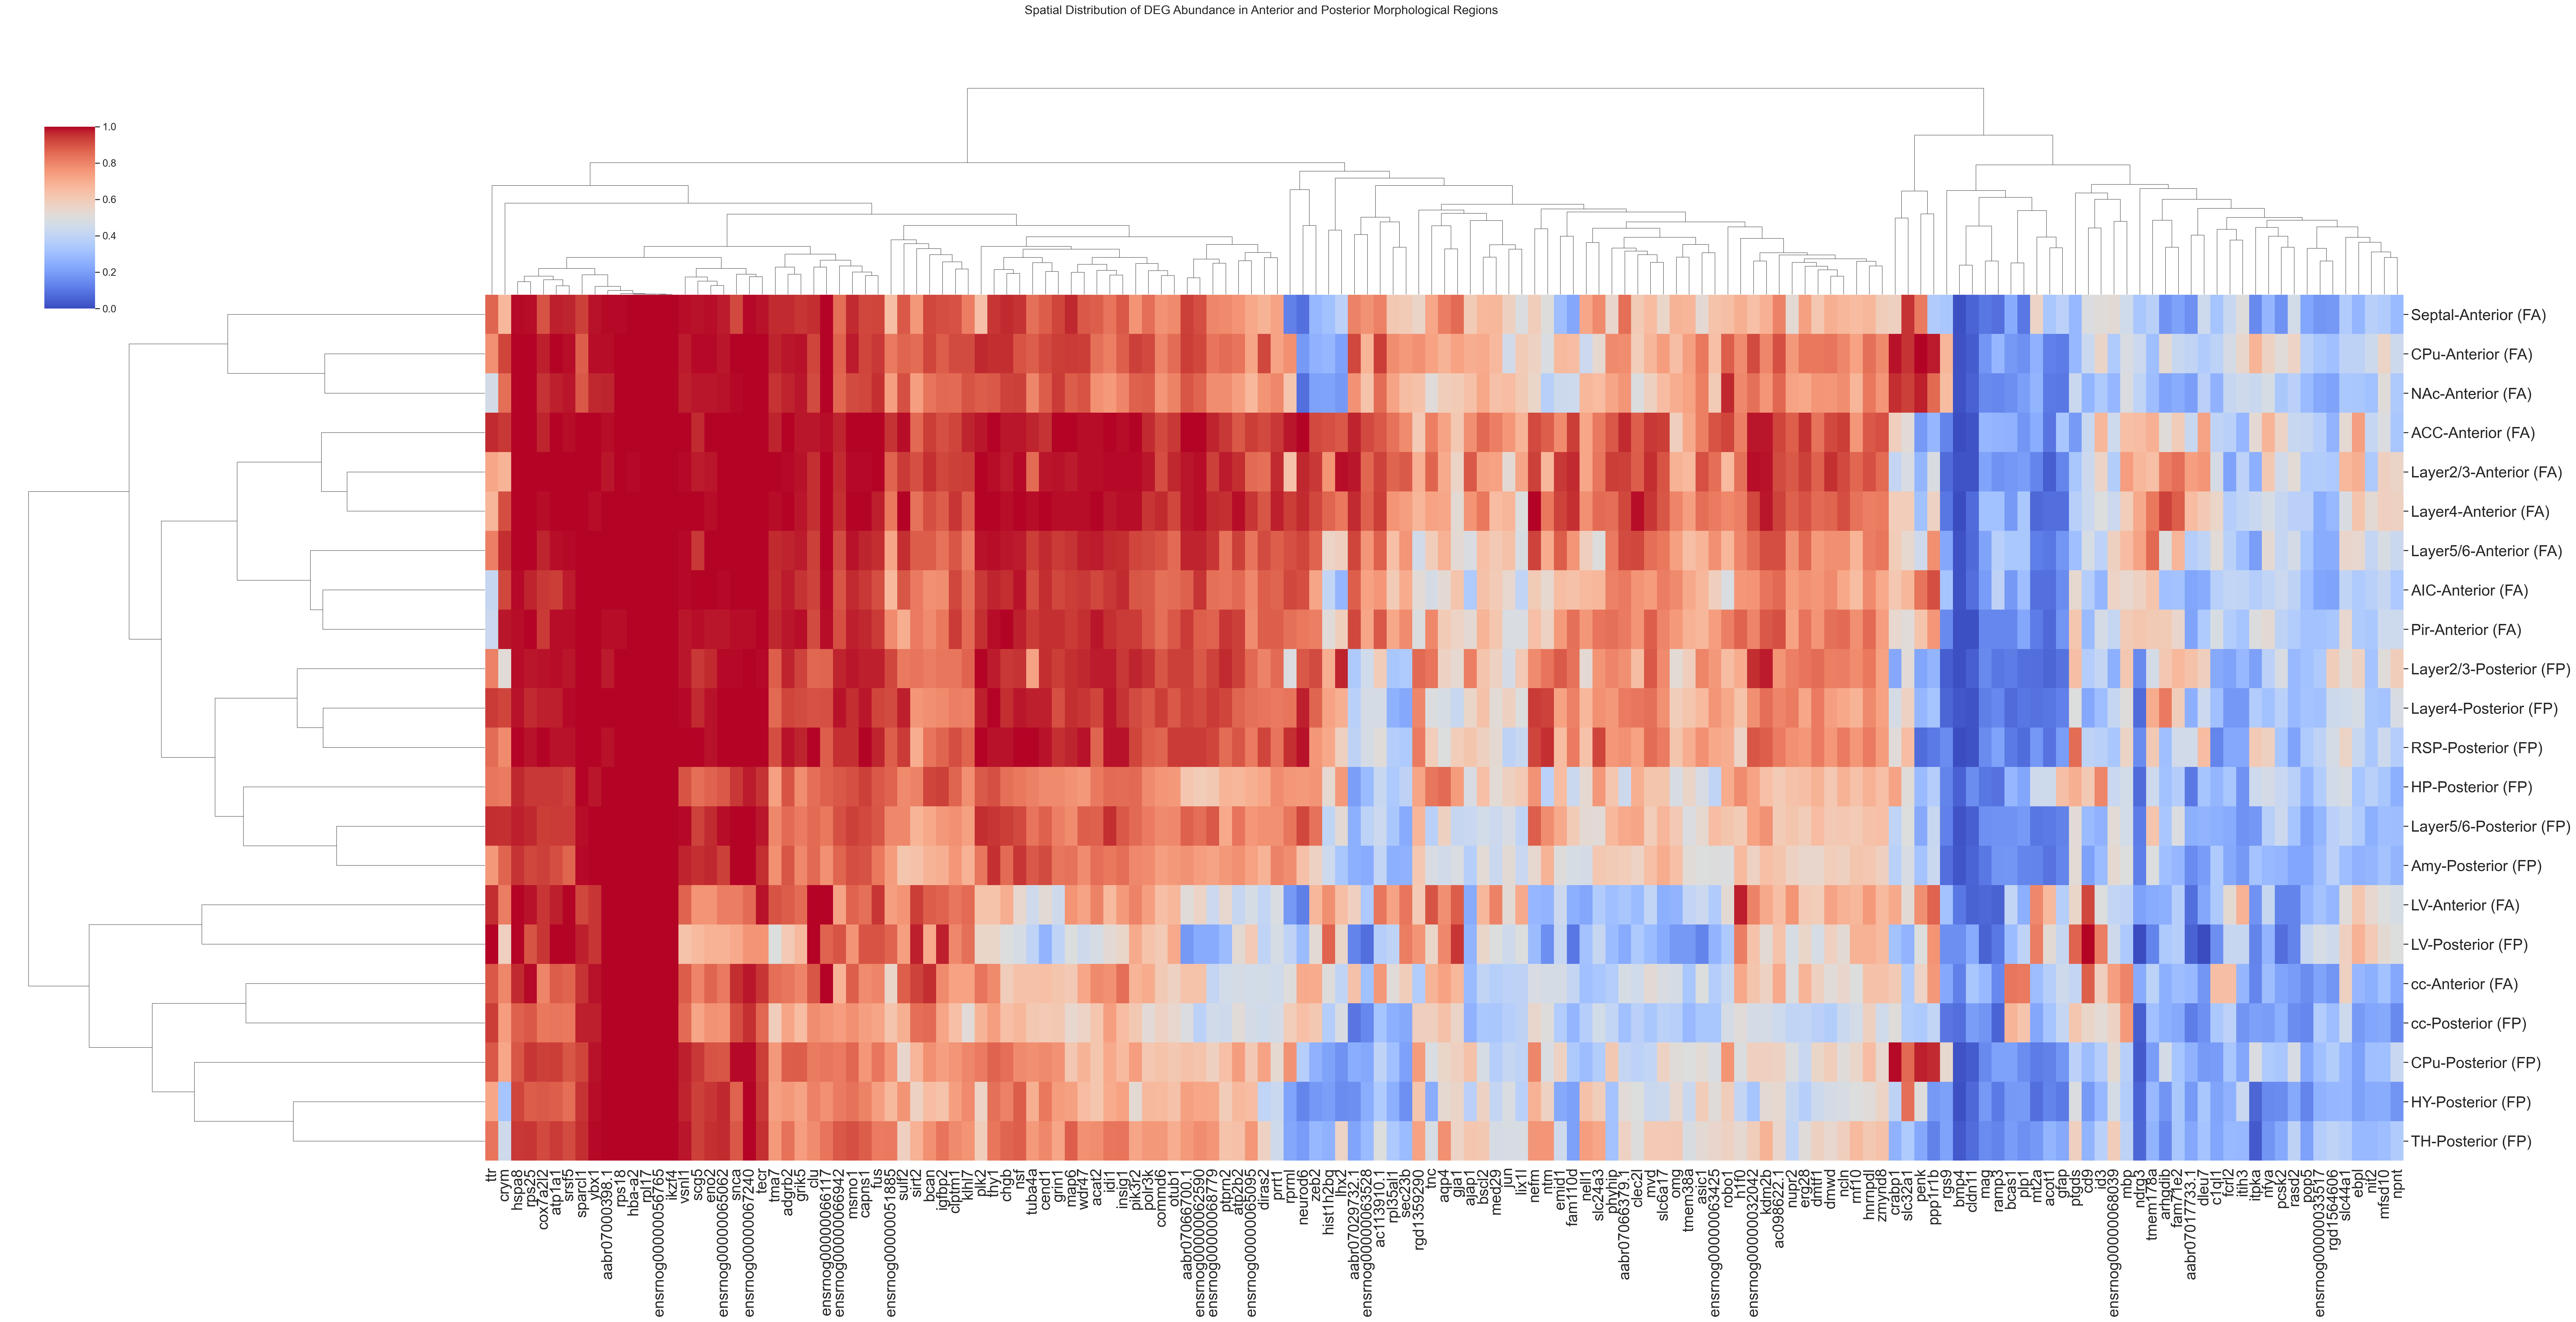

In [17]:
generate_combined_heatmap2(get_region_distribution2("FAC","P96A1", degs_all_overlap), get_region_distribution2("FPC","P93P1", degs_all_overlap), "FA", "FP", ["Layer1","Sparse"])

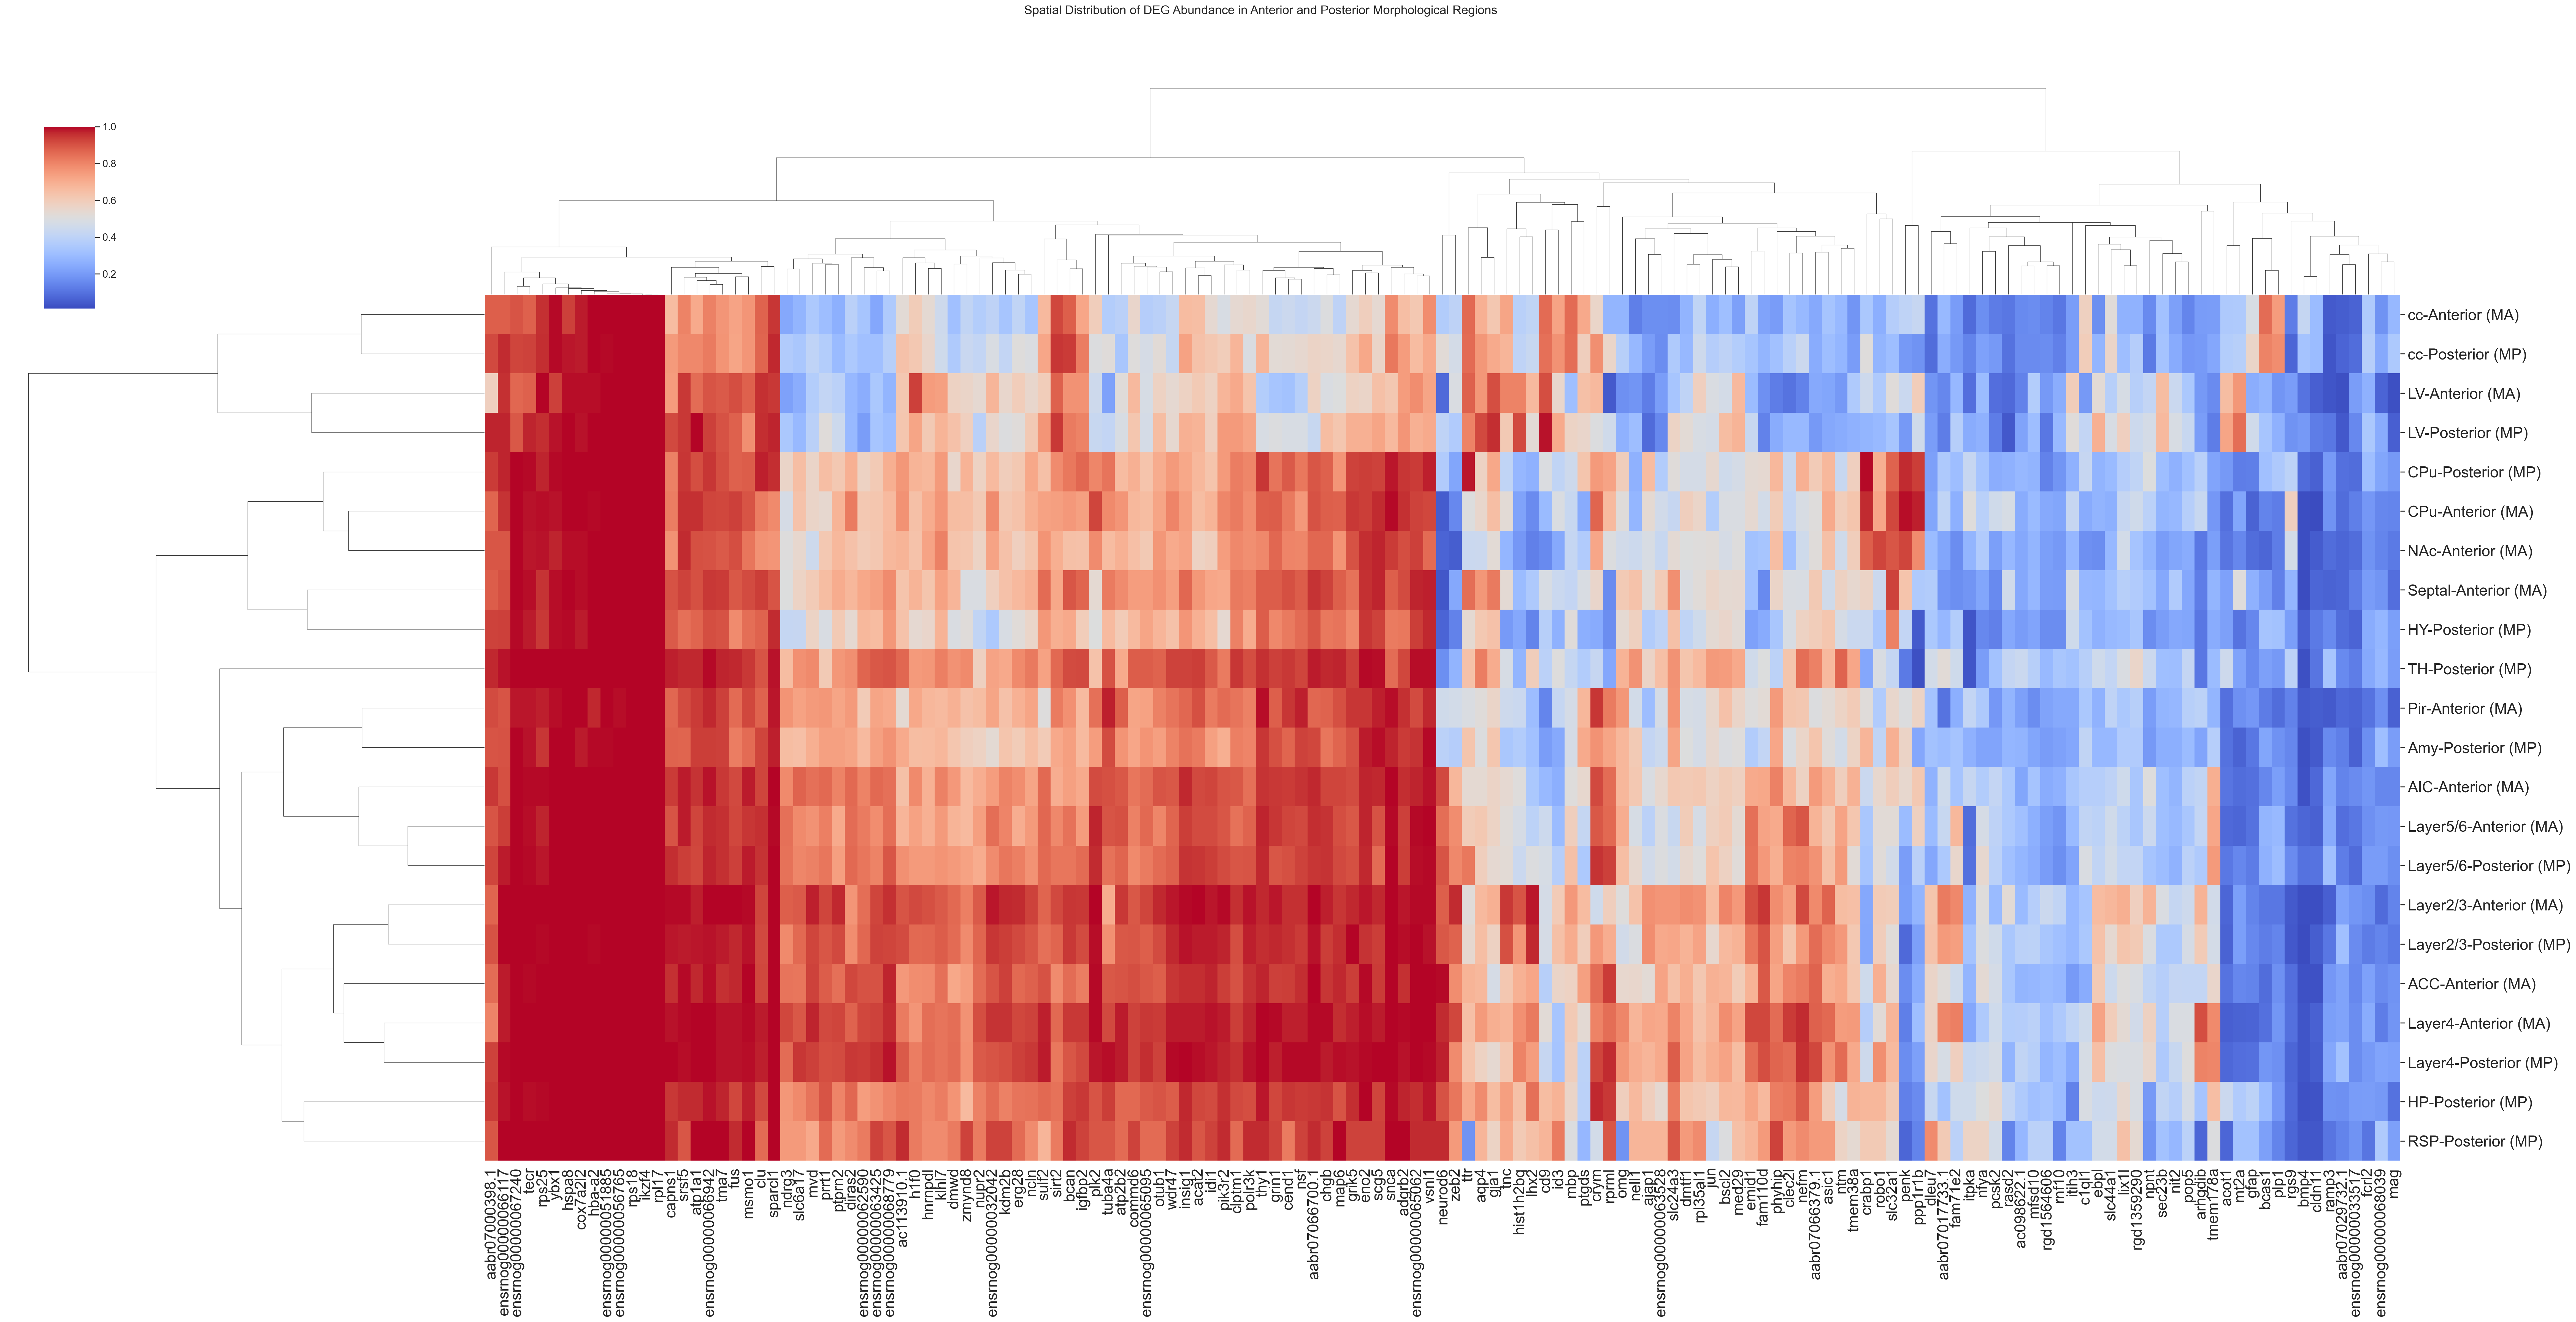

In [15]:
generate_combined_heatmap2(get_region_distribution2("MAC","P94A1", degs_all_overlap), get_region_distribution2("MPC","P94P1", degs_all_overlap), "MA", "MP",  ["Layer1","Sparse"])